In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datos.csv', sep='|', on_bad_lines='skip', parse_dates=['datetime'], index_col='datetime')
df.head()

,K-1303_Engine_RPM,K-1303_Engine_Load_Factor,K-1303_Fuel_Gas_Pressure,K-1303_Pre_Catalyst_Temperature,K-1303_Post_Catalyst_Temperature,K-1303_Actual_Engine_Timing,K-1303_Inlet_Air_Temperature,K-1303_Fuel_Pressure_-_Absolute,K-1303_Engine_Fuel_Gas_Temperature,K-1303_Fuel_Valve_Position,...,K-1303_Suction_Screen_Differential_Pressure,K-1303_Stage_#1_Suction_Temperature,K-1303_Cylinder_#1_Temperature,K-1303_Stage_#2_Suction_Temperature,K-1303_Cylinder_#2_Temperature,K-1303_Stage_#3_Suction_Temperature,K-1303_Cylinder_#3_Temperature,K-1303_Cylinder_#4_Temperature,Train_1_Inlet_Separator_Pressure,Train_1_Sales_Pressure
datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train = df.loc['2019-09-05':'2020-09-04']

In [4]:
test = df.loc['2018-08-01':'2019-04-01']

# Exploratory Data Analysis

First let's analyze basic information about the data. We are going to see the **statistics**, the **distribution plot**, the **time series plot** and the **correlation matrix** of the variables.

Then, we are going to separate the variables by it's relevance with the motor and the compressor (see PDF with the list) and check the same plots.

In [5]:
train.shape

(8761, 59)

In [6]:
train.describe()

,K-1303_Engine_RPM,K-1303_Engine_Load_Factor,K-1303_Fuel_Gas_Pressure,K-1303_Pre_Catalyst_Temperature,K-1303_Post_Catalyst_Temperature,K-1303_Actual_Engine_Timing,K-1303_Inlet_Air_Temperature,K-1303_Fuel_Pressure_-_Absolute,K-1303_Engine_Fuel_Gas_Temperature,K-1303_Fuel_Valve_Position,...,K-1303_Suction_Screen_Differential_Pressure,K-1303_Stage_#1_Suction_Temperature,K-1303_Cylinder_#1_Temperature,K-1303_Stage_#2_Suction_Temperature,K-1303_Cylinder_#2_Temperature,K-1303_Stage_#3_Suction_Temperature,K-1303_Cylinder_#3_Temperature,K-1303_Cylinder_#4_Temperature,Train_1_Inlet_Separator_Pressure,Train_1_Sales_Pressure
count,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,...,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8502.000000,8265.000000,305.000000
mean,1299.227241,75.513879,31.124053,883.274524,799.272171,26.195672,148.332322,16.783630,68.450317,38.237356,...,0.291955,52.224535,163.329687,94.034933,214.662080,92.936250,164.260997,219.615973,129.238445,1166.633326
std,229.455218,14.010608,1.480983,166.183255,154.248624,3.488657,9.827804,0.754351,16.884333,6.322016,...,0.547051,9.227460,27.169063,10.776066,44.424512,19.951834,16.237698,42.286336,7.124415,15.997491
min,0.000000,0.000000,27.299999,63.000000,0.000000,0.000000,61.520000,13.561050,35.599998,0.000000,...,0.000000,19.000000,0.000000,53.000000,-102.000000,0.000000,57.000000,0.000000,0.559280,1057.113037
25%,1256.500000,71.000000,30.299999,915.000000,831.000000,23.000000,143.240005,16.896931,57.200001,39.000000,...,0.100000,44.000000,162.000000,87.000000,216.000000,82.000000,160.000000,219.000000,127.166199,1167.349976
50%,1371.000000,80.000000,30.900000,921.000000,836.000000,27.299999,147.559998,16.969450,64.400002,40.000000,...,0.200000,52.000000,165.000000,93.000000,227.000000,93.000000,163.000000,229.000000,128.378296,1170.441040
75%,1395.000000,84.000000,31.600000,927.000000,843.000000,29.100000,152.240005,17.041969,77.000000,41.000000,...,0.200000,60.000000,176.000000,101.000000,237.000000,107.000000,174.000000,238.000000,129.973206,1173.150024
max,1430.000000,95.000000,38.299999,1043.000000,891.000000,29.700001,200.000000,17.332041,149.000000,100.000000,...,8.500000,92.000000,192.000000,128.000000,261.000000,138.000000,195.000000,268.000000,298.199799,1176.859985


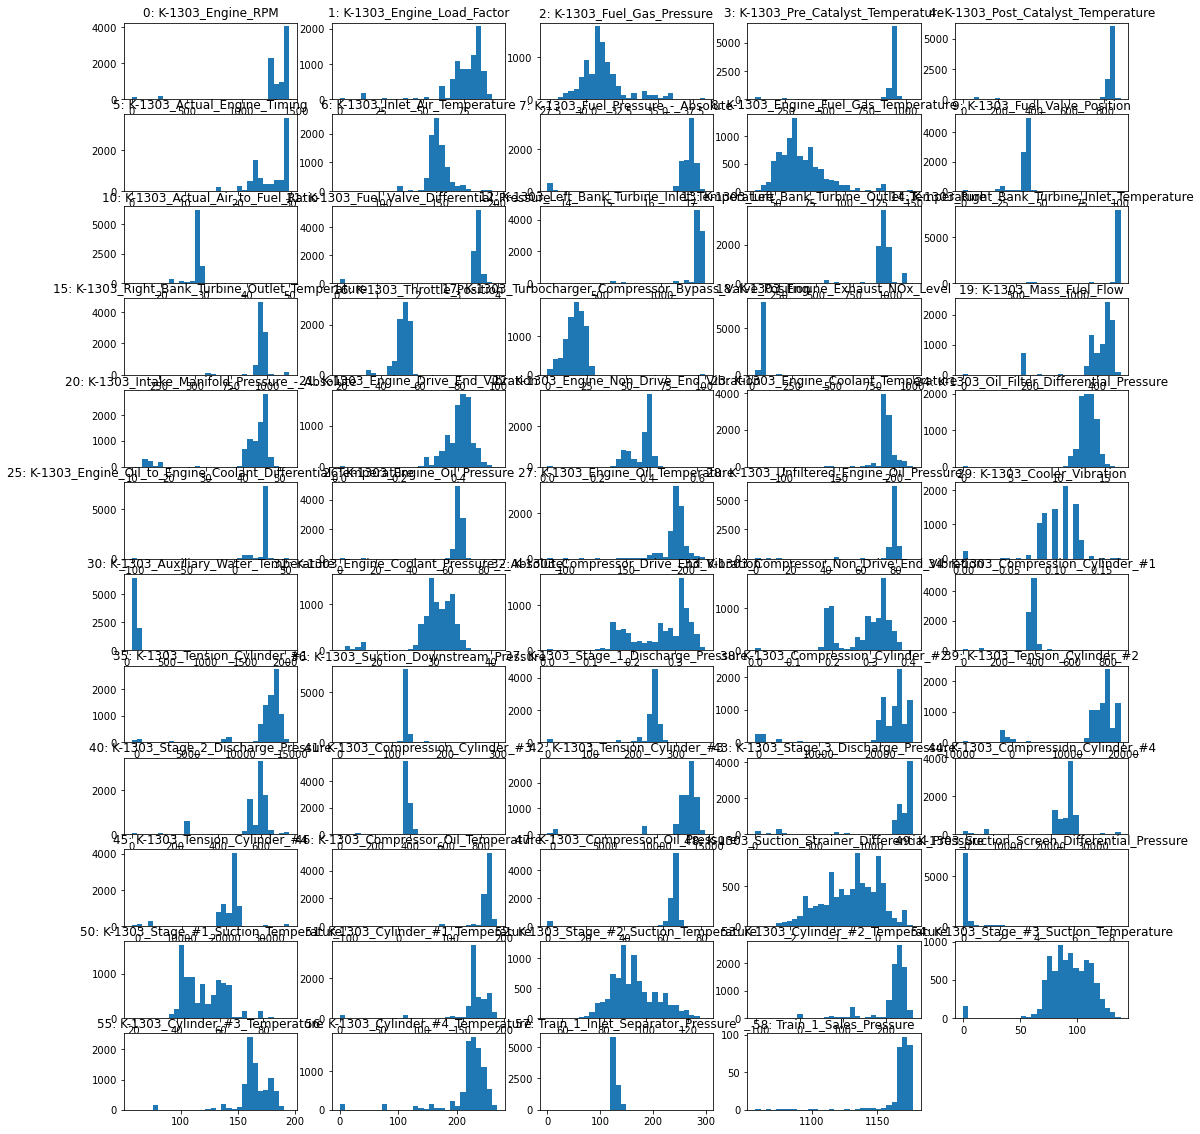

In [7]:
fig, axes = plt.subplots(12, 5, figsize=(18, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 58:
        ax.set_visible(False)
        continue
    ax.hist(train.iloc[:, i], bins=30)
    ax.set_title("{}: {}".format(i, train.columns[i]))

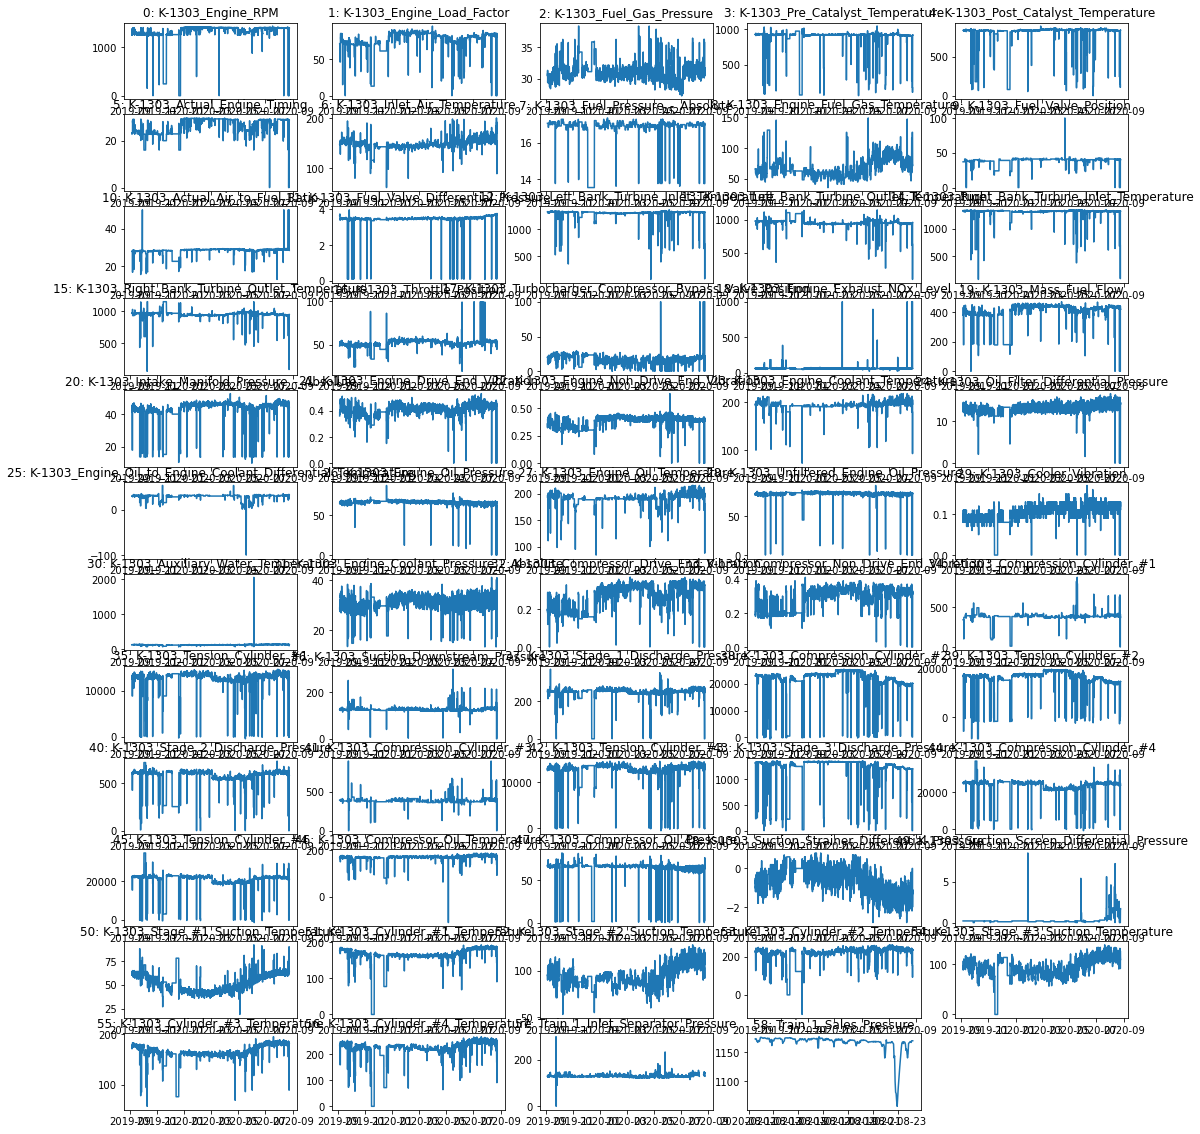

In [8]:
fig, axes = plt.subplots(12, 5, figsize=(18, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 58:
        ax.set_visible(False)
        continue
    ax.plot(train.iloc[:, i])
    ax.set_title("{}: {}".format(i, train.columns[i]))

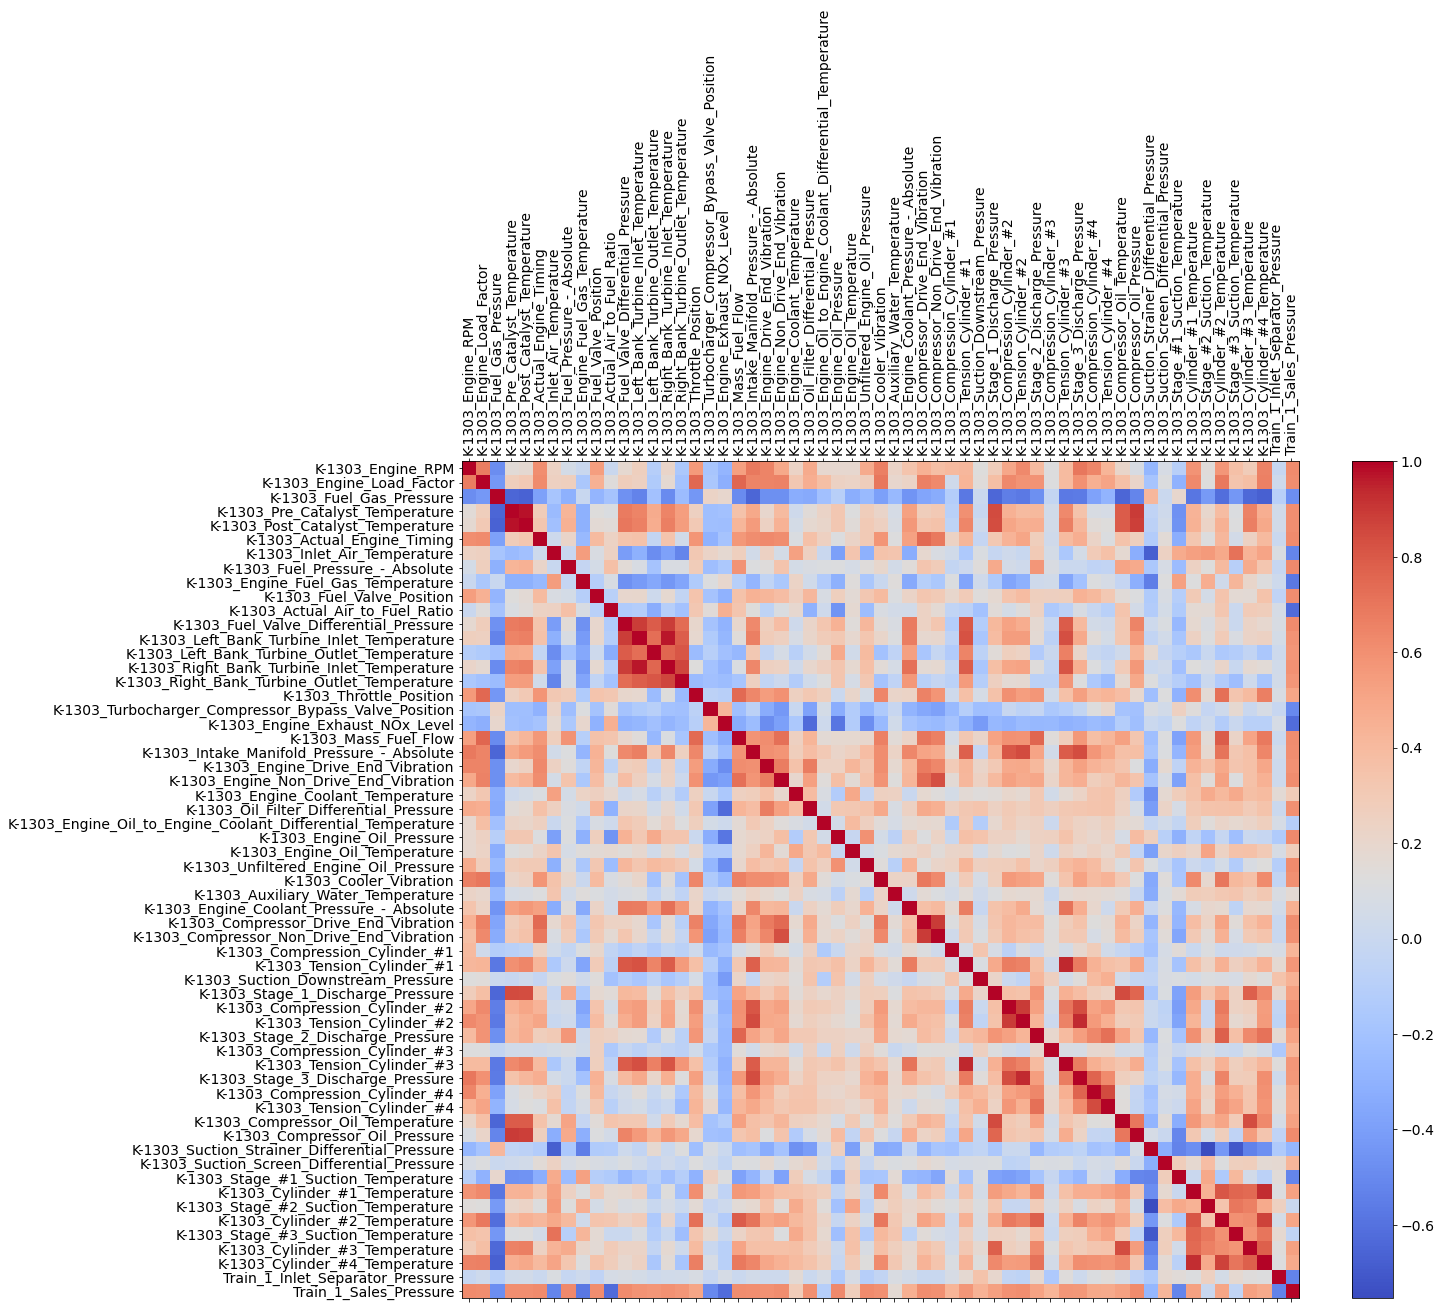

In [9]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(train.shape[1]), train.columns, fontsize=14, rotation=90)
plt.yticks(range(train.shape[1]), train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Motor and Compressor's variables

In [10]:
motor = df[['K-1303_Engine_RPM',
'K-1303_Engine_Drive_End_Vibration',
'K-1303_Engine_Non_Drive_End_Vibration',
'K-1303_Engine_Load_Factor',
'K-1303_Engine_Coolant_Temperature',
'K-1303_Oil_Filter_Differential_Pressure',
'K-1303_Engine_Oil_to_Engine_Coolant_Differential_Temperature',
'K-1303_Engine_Oil_Pressure',
'K-1303_Engine_Oil_Temperature',
'K-1303_Inlet_Air_Temperature',
'K-1303_Unfiltered_Engine_Oil_Pressure',
'K-1303_Intake_Manifold_Pressure_-_Absolute',
'K-1303_Cooler_Vibration',
'K-1303_Auxiliary_Water_Temperature',
'K-1303_Engine_Coolant_Pressure_-_Absolute']]

In [11]:
compressor = df[['K-1303_Engine_RPM',
'K-1303_Engine_Load_Factor',
'K-1303_Compressor_Drive_End_Vibration',
'K-1303_Compressor_Non_Drive_End_Vibration',
'K-1303_Compression_Cylinder_#1',
'K-1303_Tension_Cylinder_#1',
'K-1303_Suction_Downstream_Pressure',
'K-1303_Stage_1_Discharge_Pressure',
'K-1303_Compression_Cylinder_#2',
'K-1303_Tension_Cylinder_#2',
'K-1303_Stage_2_Discharge_Pressure',
'K-1303_Compression_Cylinder_#3',
'K-1303_Tension_Cylinder_#3',
'K-1303_Stage_3_Discharge_Pressure',
'K-1303_Compression_Cylinder_#4',
'K-1303_Tension_Cylinder_#4',
'K-1303_Compressor_Oil_Temperature',
'K-1303_Compressor_Oil_Pressure',
'K-1303_Inlet_Air_Temperature',
'K-1303_Auxiliary_Water_Temperature']]

In [12]:
motor_train = motor.loc['2019-09-05':'2020-09-04']
motor_test = motor.loc['2018-08-01':'2019-04-01']

In [13]:
compressor_train = compressor.loc['2019-09-05':'2020-09-04']
compressor_test = compressor.loc['2018-08-01':'2019-04-01']

## Motor

In [14]:
motor_train.shape

(8761, 15)

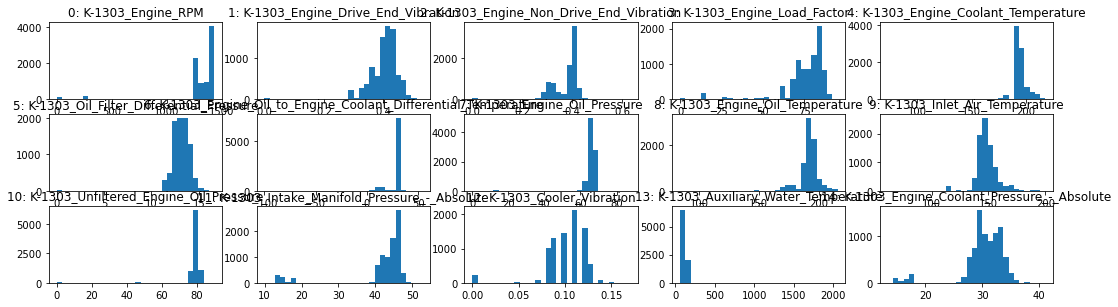

In [15]:
fig, axes = plt.subplots(12, 5, figsize=(18, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 14:
        ax.set_visible(False)
        continue
    ax.hist(motor_train.iloc[:, i], bins=30)
    ax.set_title("{}: {}".format(i, motor_train.columns[i]))

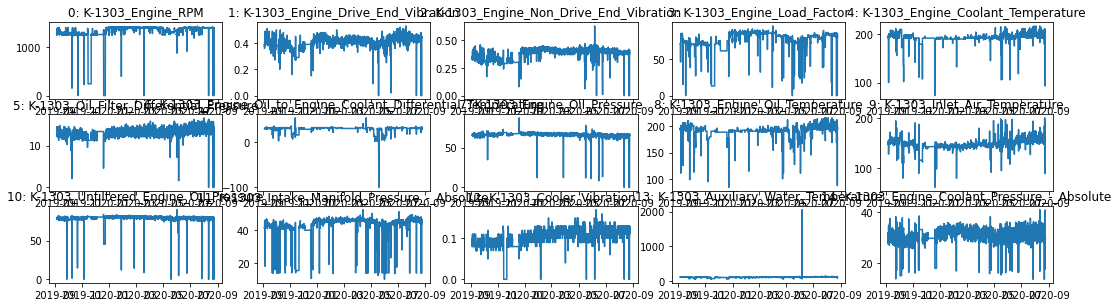

In [16]:
fig, axes = plt.subplots(12, 5, figsize=(18, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 14:
        ax.set_visible(False)
        continue
    ax.plot(motor_train.iloc[:, i])
    ax.set_title("{}: {}".format(i, motor_train.columns[i]))

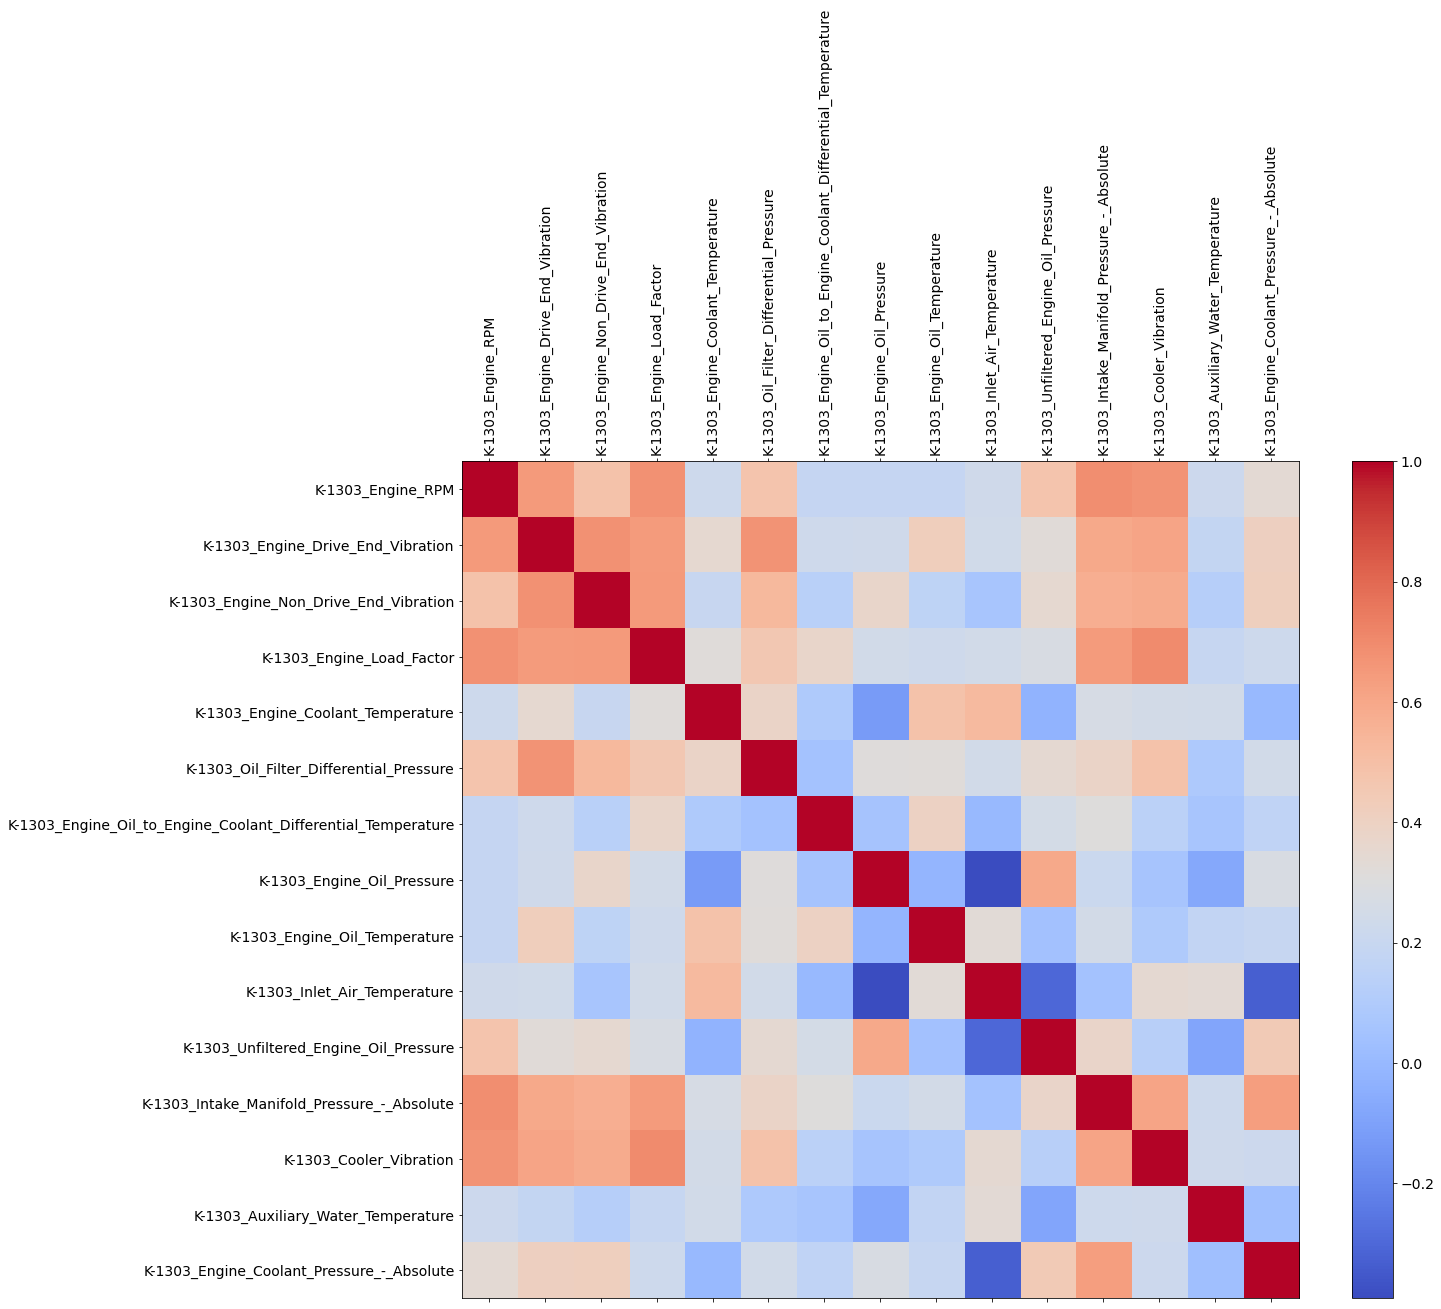

In [17]:
f = plt.figure(figsize=(19, 15))
plt.matshow(motor_train.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(motor_train.shape[1]), motor_train.columns, fontsize=14, rotation=90)
plt.yticks(range(motor_train.shape[1]), motor_train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

## Compressor

In [110]:
compressor_train.shape

(8761, 20)

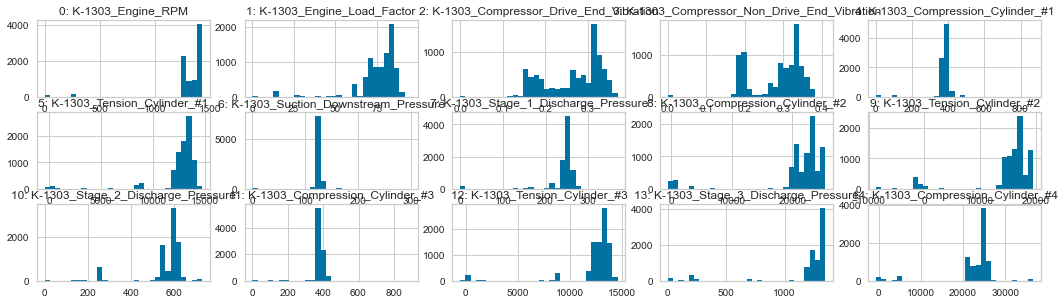

In [111]:
fig, axes = plt.subplots(12, 5, figsize=(18, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 14:
        ax.set_visible(False)
        continue
    ax.hist(compressor_train.iloc[:, i], bins=30)
    ax.set_title("{}: {}".format(i, compressor_train.columns[i]))

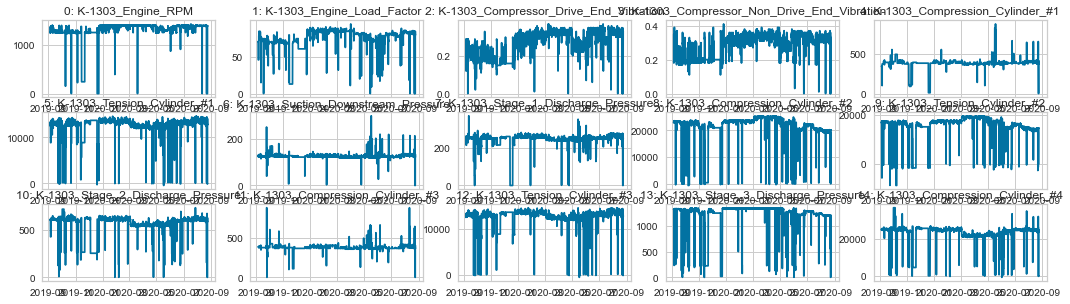

In [112]:
fig, axes = plt.subplots(12, 5, figsize=(18, 20))
for i, ax in enumerate(axes.ravel()):
    if i > 14:
        ax.set_visible(False)
        continue
    ax.plot(compressor_train.iloc[:, i])
    ax.set_title("{}: {}".format(i, compressor_train.columns[i]))

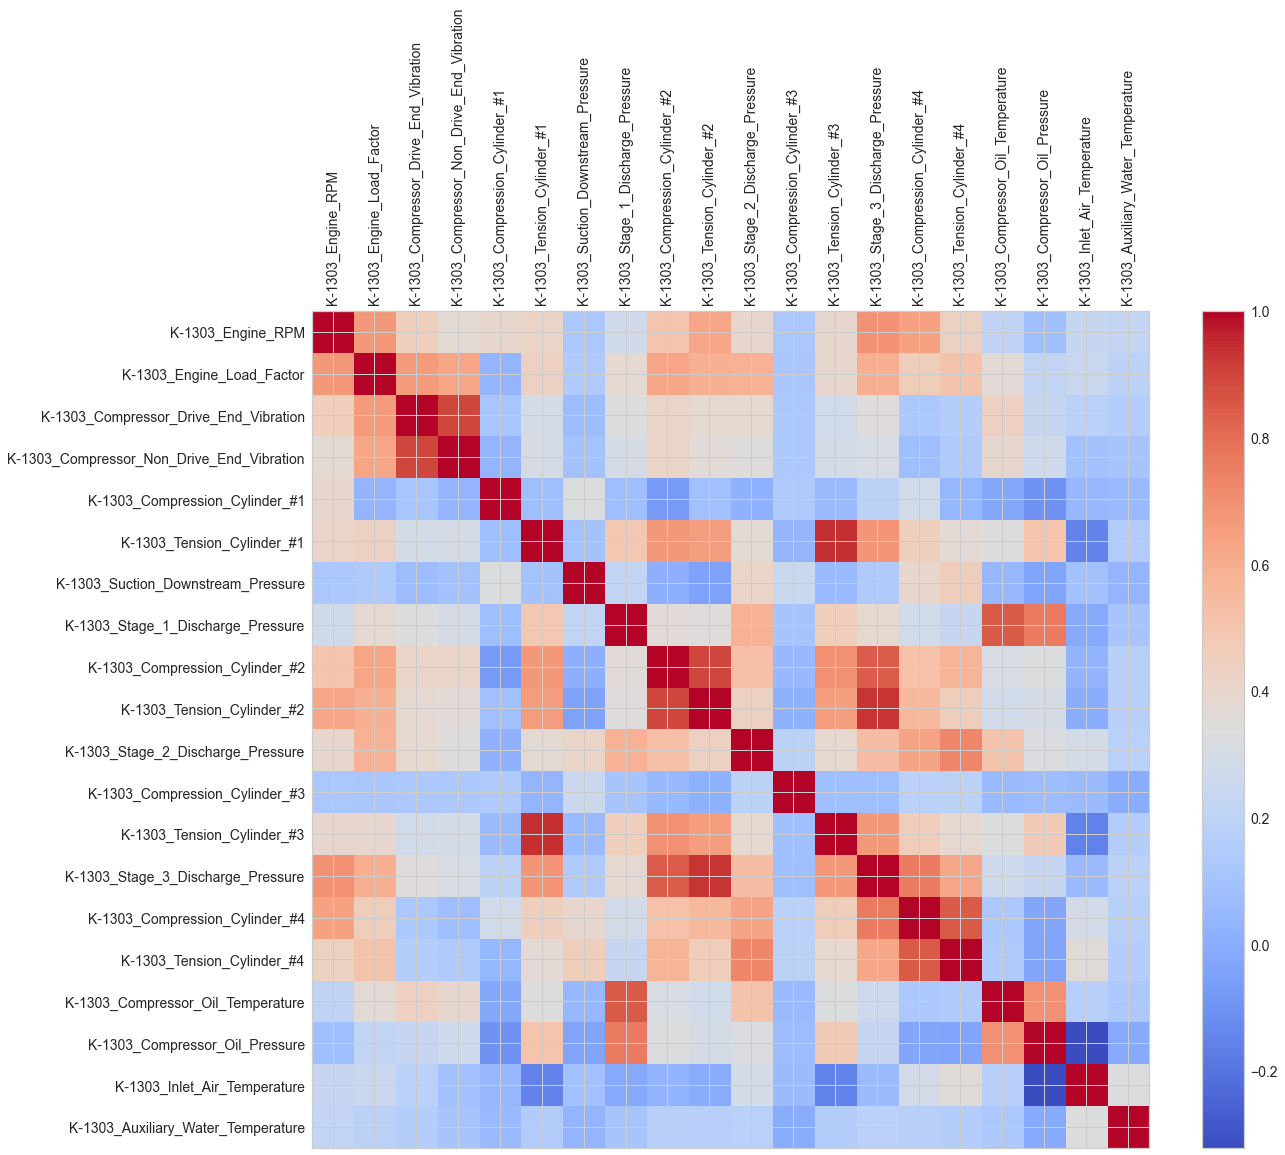

In [113]:
f = plt.figure(figsize=(19, 15))
plt.matshow(compressor_train.corr(), fignum=f.number, cmap=plt.cm.coolwarm)
plt.xticks(range(compressor_train.shape[1]), compressor_train.columns, fontsize=14, rotation=90)
plt.yticks(range(compressor_train.shape[1]), compressor_train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Baseline models

We are going to apply unsupervised models that are going to work as baseline for our analysis.

- The first one is an AutoML Isolation forest with pycaret (__https://towardsdatascience.com/unsupervised-anomaly-detection-in-python-f2e61be17c2b__).

- The second one is an One-Class SVM with Scikit-Learn (__https://towardsdatascience.com/outlier-detection-with-one-class-svms-5403a1a1878c__).

- The third one is an AutoML One-Class SVM with pycaret.

We are going to be able to visualize when the errors occurred.

## AutoML Isolation Forest

In [18]:
from pycaret.anomaly import * 

C:\Users\ghopk\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\ghopk\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\ghopk\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [128]:
anom = setup(data = df, 
             silent = True)

,Description,Value
0,session_id,5435
1,Original Data,"(18361, 59)"
2,Missing Values,True
3,Numeric Features,59
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(18361, 59)"
9,CPU Jobs,-1


In [129]:
anom_model = create_model(model = 'iforest', fraction = 0.005)

In [130]:
results = assign_model(anom_model)

In [22]:
#plot_model(anom_model, plot = 'tsne')

In [23]:
#plot_model(anom_model, plot = 'umap')

In [131]:
res = results[['Anomaly', 'Anomaly_Score']]

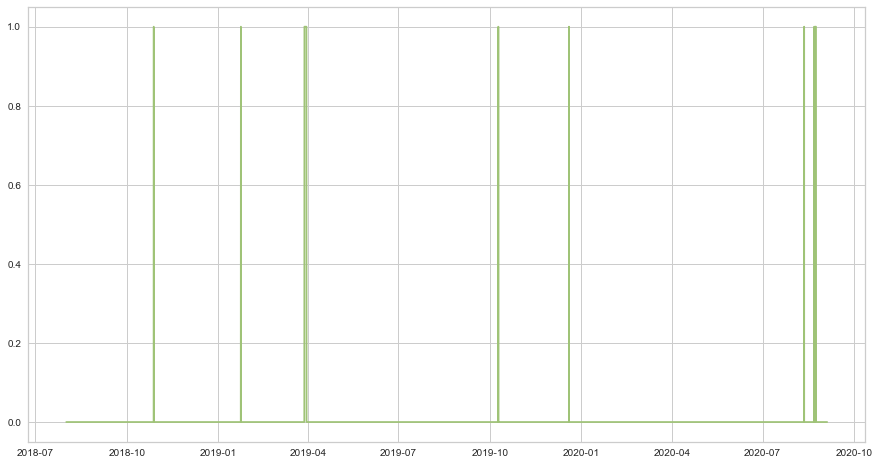

In [132]:
plt.figure(figsize=(15,8))
plt.plot(df.index, res['Anomaly'], color='g')

## OneClass SVM

In [26]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [133]:
from sklearn.svm import OneClassSVM

In [134]:
sklearn.set_config(display='diagram')

In [135]:
simple = SimpleImputer()
standard = StandardScaler()
kmeans = KMeans(n_clusters=2)
pca = PCA()

In [136]:
onesvm = OneClassSVM(kernel='rbf', gamma=0.000001, nu=0.001)

In [137]:
pips = Pipeline([
    ('imputer', simple),
    ('scaler', standard),
    ('pca', pca),
    ('model', onesvm)
])
pips

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=1e-06,
                             kernel='rbf', max_iter=-1, nu=0.001,
                             shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [138]:
pips.fit(train)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('model',
                 OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=1e-06,
                             kernel='rbf', max_iter=-1, nu=0.001,
                             shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [139]:
ocpred = pips.predict(test)

In [140]:
ocpred = pd.DataFrame(ocpred).set_index(test.index)

In [141]:
ocpred = ocpred.replace(1,0).replace(-1,1)

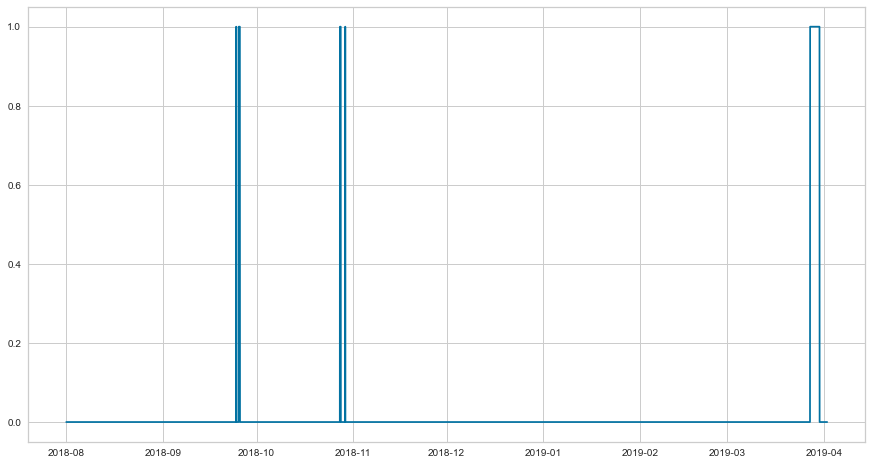

In [142]:
plt.figure(figsize=(15,8))
plt.plot(ocpred)

In [143]:
res_test = res['Anomaly'].loc['2018-08-01':'2019-04-01']

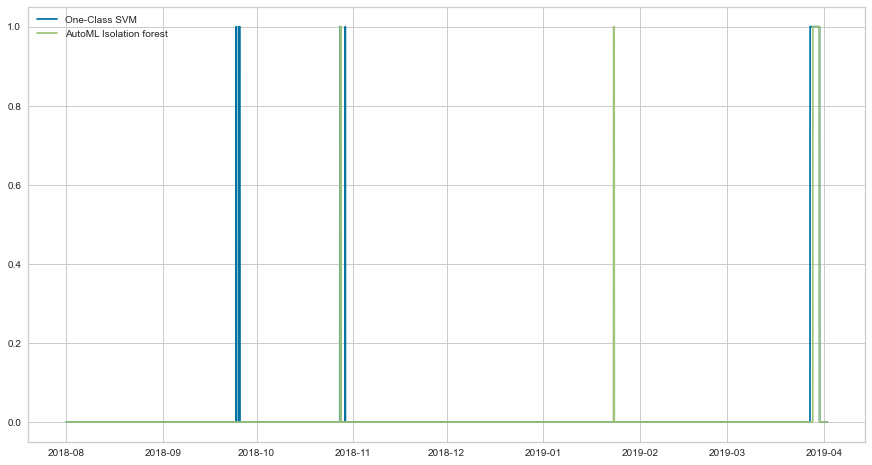

In [144]:
plt.figure(figsize=(15,8))
plt.plot(ocpred[0], label='One-Class SVM')
plt.plot(res_test, label='AutoML Isolation forest')
plt.legend()

## AutoML One-Class SVM

In [146]:
anom_model_svm = create_model(model = 'svm', fraction = 0.001)

In [147]:
results_svm = assign_model(anom_model_svm)

In [148]:
res_svm = results_svm[['Anomaly', 'Anomaly_Score']]

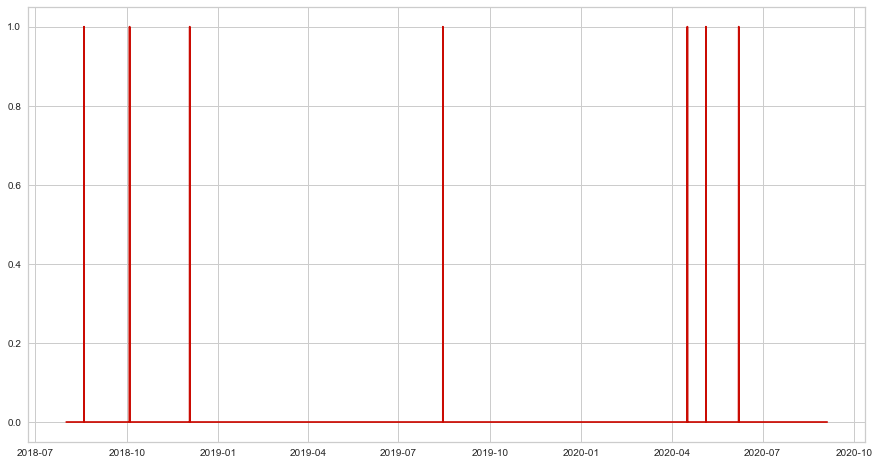

In [149]:
plt.figure(figsize=(15,8))
plt.plot(df.index, res_svm['Anomaly'], color='r')

In [150]:
res_test_svm = res_svm['Anomaly'].loc['2018-08-01':'2019-04-01']

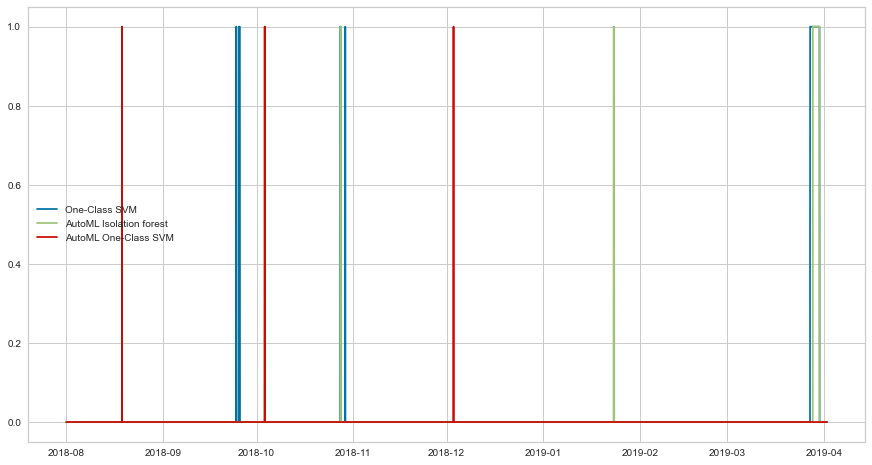

In [151]:
plt.figure(figsize=(15,8))
plt.plot(ocpred[0], label='One-Class SVM')
plt.plot(res_test, label='AutoML Isolation forest')
plt.plot(res_test_svm, label='AutoML One-Class SVM')
plt.legend()

# PCA

Now we are going to applied a PCA to evaluate if we can detect the anomalies using less dimensions.

We are also going to evaluate if separating the variables for the analysis is worthy.

## PCA MOTOR

In [45]:
import numpy as np

In [46]:
pca_eda = PCA()

We are going to build a pipeline with a simple imputer using the median and a standard scaler previous to the PCA.

Since we are going to try to detect anomalies, it could be consider to be safe to impute de null values with the mean of the variable, since almost all of them behave like a stationary process*.

*No statistical test was applied yet.

In [47]:
pca_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', pca_eda)
])
pca_pipeline

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [48]:
pc_motor_train = pd.DataFrame(pca_pipeline.fit_transform(motor_train))
pc_motor_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.883880,0.401498,-0.634127,0.062605,-0.131520,0.374619,-0.481118,-0.223627,0.186866,-0.552772,-0.277307,0.317739,0.376111,0.120859,-0.090134
1,0.872635,0.256480,-0.552467,-0.145310,-0.106635,0.500992,-0.158881,-0.294734,0.094603,0.193531,0.254617,-0.337688,-0.006081,0.497607,-0.032425
2,1.020034,0.360581,-0.497307,0.058501,-0.211653,0.439198,-0.375055,-0.235649,0.197634,-0.296381,0.280932,-0.026709,-0.188265,0.323332,-0.172322
3,0.876482,-0.005351,-0.336832,0.455976,-0.102562,0.359337,-0.268821,-0.093431,0.287971,-0.224548,-0.148249,0.248146,-0.103009,0.099770,-0.144929
4,0.958036,-0.098649,-0.510577,0.078765,-0.105929,0.467824,-0.435779,0.068123,0.086823,-0.329551,-0.008970,-0.116683,0.058696,0.130193,-0.198852


In [49]:
var = pd.DataFrame(pca_eda.explained_variance_ratio_)
pca_cum = np.cumsum(var)

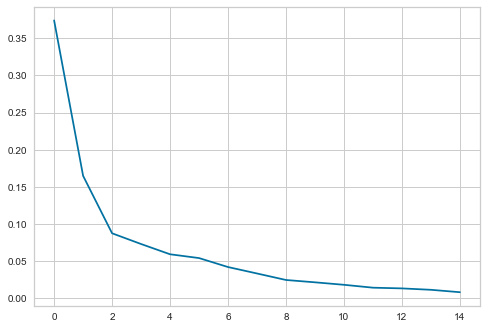

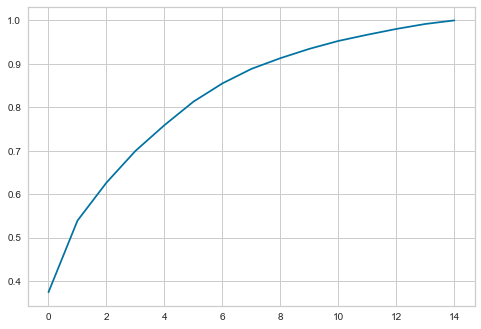

In [50]:
plt.plot(var)

plt.show()

plt.plot(pca_cum)

In [51]:
pca_cum.head(10)

,0
0,0.374044
1,0.538902
2,0.626404
3,0.699476
4,0.758738
5,0.812890
6,0.854961
7,0.888371
8,0.913023
9,0.934539


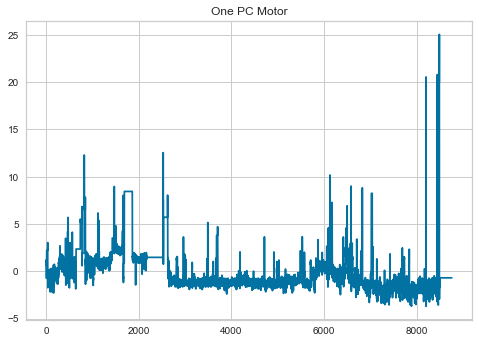

Text(0.5, 1.0, 'Two PC Motor')

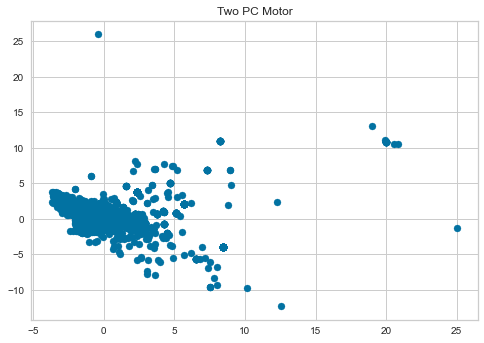

In [159]:
plt.plot(pc_motor_train[0])
plt.title('One PC Motor')
plt.show()
plt.scatter(pc_motor_train[0], pc_motor_train[1])
plt.title('Two PC Motor')

Text(0.5, 0.92, 'Three PC')

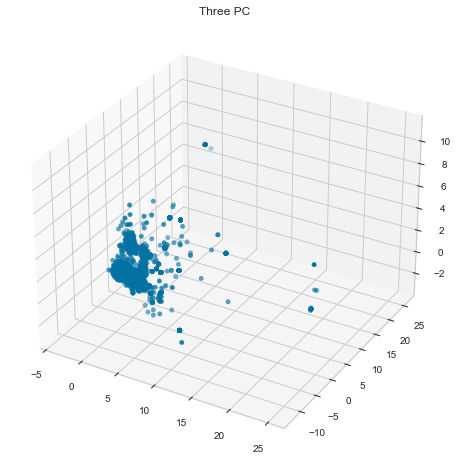

In [162]:
fig = plt.figure(figsize=(15,8))
ax = plt.axes(projection ='3d')
ax.scatter(pc_motor_train[0], pc_motor_train[1], pc_motor_train[2])
plt.title('Three PC')

In [54]:
pc_motor_test = pd.DataFrame(pca_pipeline.fit_transform(motor_test))
pc_motor_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.679735,-0.364719,-0.001916,-0.185367,0.021802,-0.2167,0.057401,-0.053116,0.151398,-0.024991,-0.007735,0.057935,0.007134,0.046458,0.035436
1,-0.679735,-0.364719,-0.001916,-0.185367,0.021802,-0.2167,0.057401,-0.053116,0.151398,-0.024991,-0.007735,0.057935,0.007134,0.046458,0.035436
2,-0.679735,-0.364719,-0.001916,-0.185367,0.021802,-0.2167,0.057401,-0.053116,0.151398,-0.024991,-0.007735,0.057935,0.007134,0.046458,0.035436
3,-0.679735,-0.364719,-0.001916,-0.185367,0.021802,-0.2167,0.057401,-0.053116,0.151398,-0.024991,-0.007735,0.057935,0.007134,0.046458,0.035436
4,-0.679735,-0.364719,-0.001916,-0.185367,0.021802,-0.2167,0.057401,-0.053116,0.151398,-0.024991,-0.007735,0.057935,0.007134,0.046458,0.035436


Text(0.5, 1.0, 'One PC in test (Motor)')

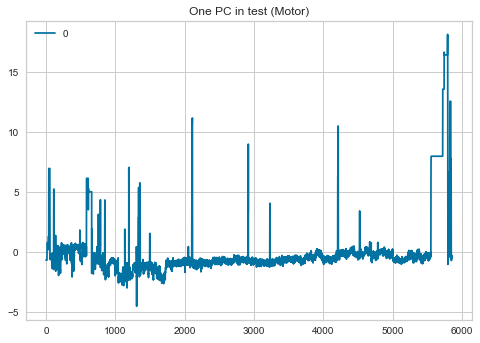

In [164]:
pc1_motor_test = pc_motor_test[0].to_frame()
pc1_motor_test.plot()
plt.title('One PC in test (Motor)')

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
pc1_motor_test = pd.DataFrame(MinMaxScaler().fit_transform(pc1_motor_test))

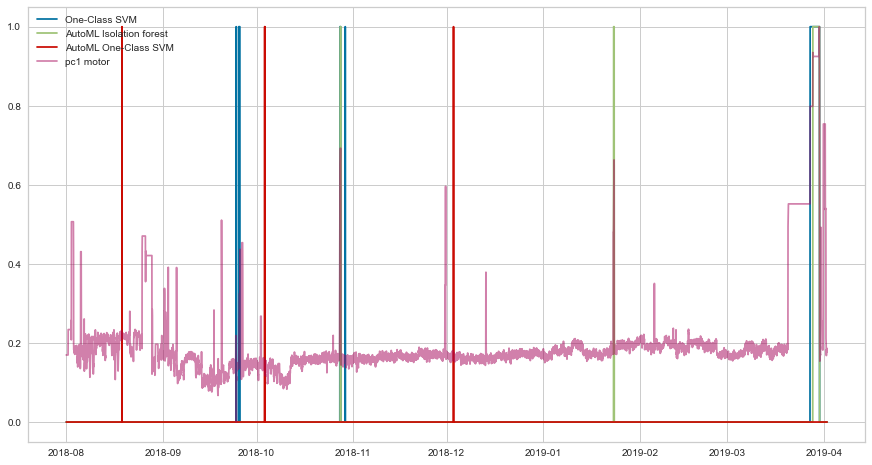

In [153]:
plt.figure(figsize=(15,8))
plt.plot(ocpred[0], label='One-Class SVM')
plt.plot(res_test, label='AutoML Isolation forest')
plt.plot(res_test_svm, label='AutoML One-Class SVM')
plt.plot(pc1_motor_test.set_index(test.index), label='pc1 motor', alpha=0.5)
plt.legend()

## PCA COMPRESSOR

In [77]:
pca_com = pd.DataFrame(pca_pipeline.fit_transform(compressor_train))

In [78]:
pca_com.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.178483,0.288097,-1.203143,-1.277822,0.970549,-0.003078,0.204610,-0.488568,0.298599,0.017171,0.205798,-0.194477,-0.044310,0.268444,0.075137,0.139774,-0.217200,0.046390,0.051286,-0.006766
1,-0.126720,0.387988,-1.246221,-1.162822,0.990167,0.011090,0.255351,-0.479817,0.267946,0.017076,0.216904,-0.230074,-0.060293,0.308328,0.149383,0.198279,-0.180742,-0.017716,-0.029307,0.006324
2,-0.036204,0.354765,-1.316972,-1.209037,0.968586,-0.025244,0.216023,-0.532087,0.377068,0.006583,0.212182,-0.249539,-0.085941,0.245075,0.074538,0.124220,-0.118407,0.019754,0.022859,-0.011677
3,-0.117508,0.338484,-1.317717,-1.173863,0.912862,-0.027251,0.267554,-0.447009,0.372488,-0.012635,0.172593,-0.229883,-0.077224,0.307960,0.103092,0.216154,-0.173142,0.055546,0.054874,-0.014320
4,-0.042901,0.314509,-1.258424,-1.164064,0.916817,-0.057843,0.188135,-0.527572,0.468776,0.050863,0.167680,-0.213738,-0.076798,0.258711,0.102511,0.169932,-0.206102,0.067704,0.046580,-0.001372


In [79]:
var_com = pd.DataFrame(pca_eda.explained_variance_ratio_)

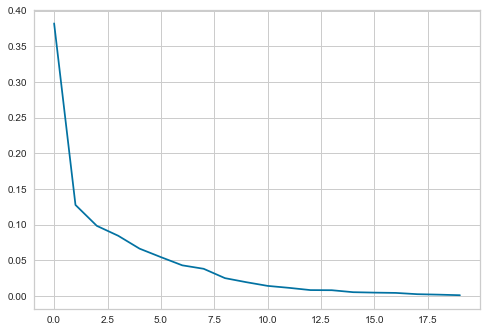

In [105]:
plt.plot(var_com)

In [81]:
var_cum_com = np.cumsum(var_com)

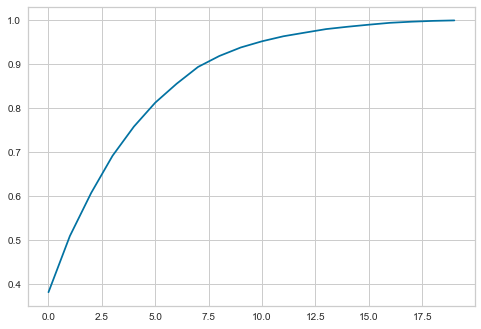

In [101]:
plt.plot(var_cum_com)

In [83]:
var_cum_com.head(10)

,0
0,0.382050
1,0.509646
2,0.607914
3,0.692320
4,0.758658
5,0.813102
6,0.856052
7,0.894158
8,0.919146
9,0.938454


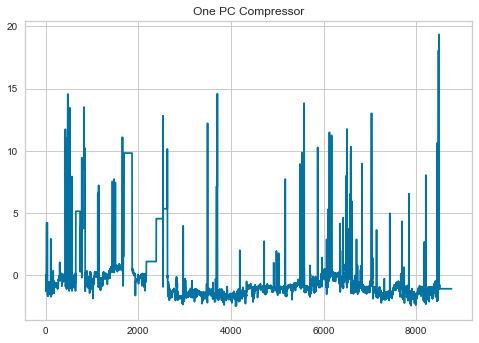

Text(0.5, 1.0, 'Two PC Compressor')

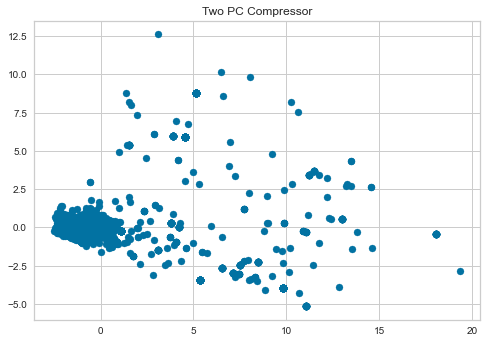

In [165]:
plt.plot(pca_com[0])
plt.title('One PC Compressor')
plt.show()
plt.scatter(pca_com[0], pca_com[1])
plt.title('Two PC Compressor')

In [114]:
pc_compressor_test = pd.DataFrame(pca_pipeline.fit_transform(compressor_test))
pc_compressor_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.922808,-0.191445,-0.385247,-0.169693,-0.058158,0.017853,0.025016,0.1721,-0.068302,0.068949,-0.020551,0.077561,-0.023445,-0.014101,0.003823,0.012173,-0.015001,-0.024674,0.042015,0.014575
1,-0.922808,-0.191445,-0.385247,-0.169693,-0.058158,0.017853,0.025016,0.1721,-0.068302,0.068949,-0.020551,0.077561,-0.023445,-0.014101,0.003823,0.012173,-0.015001,-0.024674,0.042015,0.014575
2,-0.922808,-0.191445,-0.385247,-0.169693,-0.058158,0.017853,0.025016,0.1721,-0.068302,0.068949,-0.020551,0.077561,-0.023445,-0.014101,0.003823,0.012173,-0.015001,-0.024674,0.042015,0.014575
3,-0.922808,-0.191445,-0.385247,-0.169693,-0.058158,0.017853,0.025016,0.1721,-0.068302,0.068949,-0.020551,0.077561,-0.023445,-0.014101,0.003823,0.012173,-0.015001,-0.024674,0.042015,0.014575
4,-0.922808,-0.191445,-0.385247,-0.169693,-0.058158,0.017853,0.025016,0.1721,-0.068302,0.068949,-0.020551,0.077561,-0.023445,-0.014101,0.003823,0.012173,-0.015001,-0.024674,0.042015,0.014575


Text(0.5, 1.0, 'One PC in test (Compressor)')

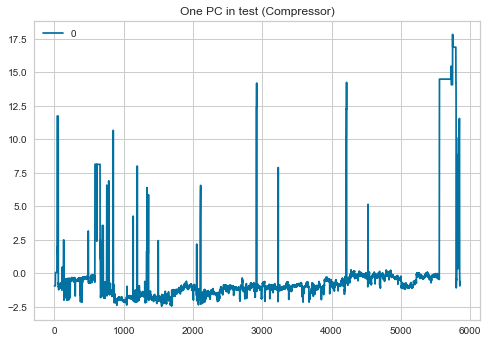

In [166]:
pc1_compressor_test = pc_compressor_test[0].to_frame()
pc1_compressor_test.plot()
plt.title('One PC in test (Compressor)')

In [116]:
pc1_compressor_test = pd.DataFrame(MinMaxScaler().fit_transform(pc1_compressor_test))

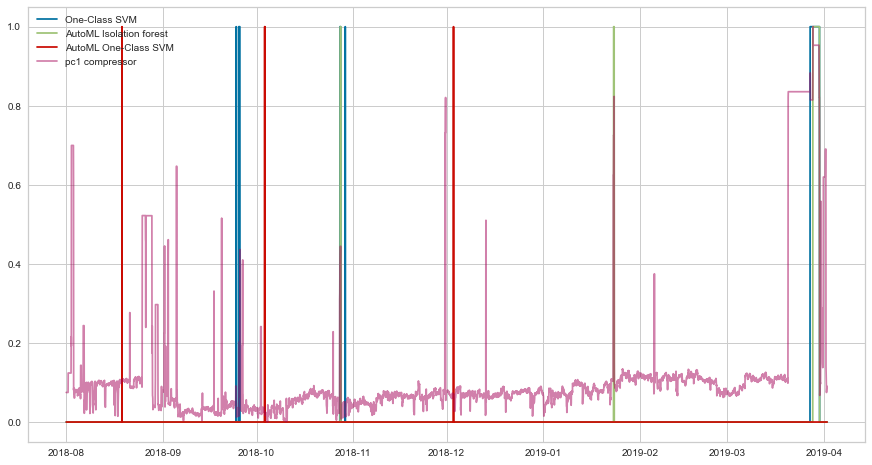

In [154]:
plt.figure(figsize=(15,8))
plt.plot(ocpred[0], label='One-Class SVM')
plt.plot(res_test, label='AutoML Isolation forest')
plt.plot(res_test_svm, label='AutoML One-Class SVM')
plt.plot(pc1_compressor_test.set_index(test.index), label='pc1 compressor', alpha=0.5)
plt.legend()

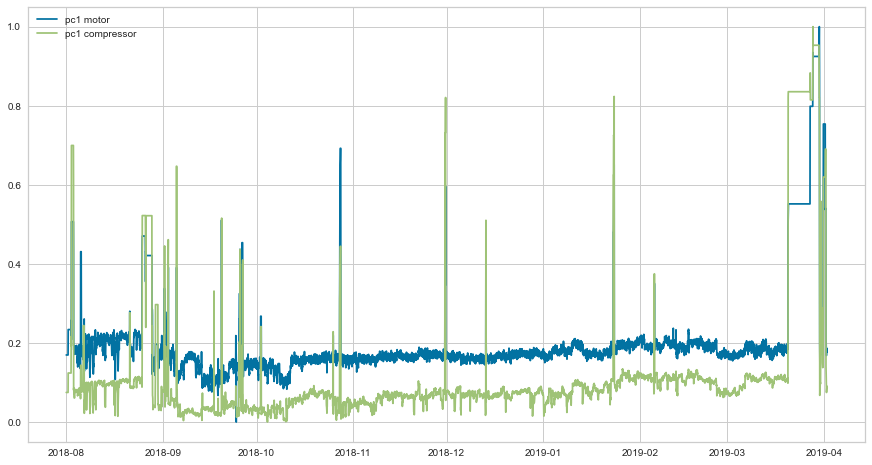

In [119]:
plt.figure(figsize=(15,8))
plt.plot(pc1_motor_test.set_index(test.index), label='pc1 motor')
plt.plot(pc1_compressor_test.set_index(test.index), label='pc1 compressor')
plt.legend()

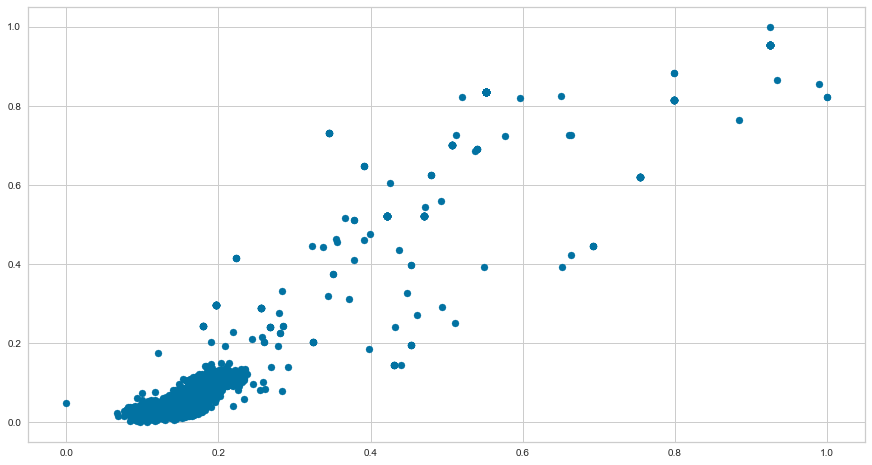

In [121]:
plt.figure(figsize=(15,8))
plt.scatter(pc1_motor_test, pc1_compressor_test)

In [127]:
pc1_compressor_test[0].corr(pc1_motor_test[0])

0.9427727153888843

The PCs of the motor and the compressor and highly correlated. Furthermore, it could not be necessary to separate the variables to understand the behaviour of the compressor.